In [11]:
import pandas as pd
import numpy as np
#from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re 
import glob
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [3]:
pd.read_csv('../corpus/corpora/epik/epik.csv')

,Unnamed: 0,text,ID,Autor,Titel
0,epik_lemma_mann_tristan,tristan von thomas mann hier sein > einfried <...,epik_lemma_mann_tristan,mann,tristan
1,epik_lemma_brentano_rosenkranz,clemens brentano herausgeben und einleiten von...,epik_lemma_brentano_rosenkranz,brentano,rosenkranz
2,epik_lemma_wassermann_vierzig,die mann von vierzig jahr eine klein roman von...,epik_lemma_wassermann_vierzig,wassermann,vierzig
3,epik_lemma_lewald_clementine,fanny lewald clementine erste capitel also wei...,epik_lemma_lewald_clementine,lewald,clementine
4,epik_lemma_schnitzler_tanzerin,die griechisch tänzerin und andere novelle von...,epik_lemma_schnitzler_tanzerin,schnitzler,tanzerin
5,epik_lemma_bonsels_maja,die biene maja und ihr abenteuer von dies buch...,epik_lemma_bonsels_maja,bonsels,maja
6,epik_lemma_may_wuste,durch wüste und harem reiseerlebnis von carl m...,epik_lemma_may_wuste,may,wuste
7,epik_lemma_falke_durchschnitt,aus die durchschnitt roman von gustav falke ha...,epik_lemma_falke_durchschnitt,falke,durchschnitt
8,epik_lemma_spyri_heidi1,johanna spyri heidi können brauchen was es l...,epik_lemma_spyri_heidi1,spyri,heidi1
9,epik_lemma_goethe_faust1,faust die tragödie erst teil johann wolfgang...,epik_lemma_goethe_faust1,goethe,faust1


In [12]:
z = pd.read_csv('../results/delta/fontane/zscores_fontane.csv')
# ind = []
# for i, row in z.iterrows():
#     ind.append(str('lyrik_' + row['Unnamed: 0'].split('_')[2] + '_' + row['Unnamed: 0'].split('_')[3]))
z.index = list(z['Unnamed: 0'])
z.drop('Unnamed: 0', axis=1, inplace=True)
# z.to_csv('../results/delta/zscores_lyrik.csv')
z

,in+die,herz,zu+die,an+die,alt,stehen,liegen,still,glück,kind,...,schwalbe,winken,soso,hecke,nest,frack,rute,gelächter,zuzeiten,hamilton
autoren_lyrik_lemma_Fontane_Die zwei Raben,-0.572996,-0.374771,-0.357604,-0.297227,-0.334234,-0.207624,-0.261117,-0.247157,-0.193487,-0.202139,...,-0.088334,-0.096148,-0.046929,-0.053896,25.624011,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647
autoren_lyrik_lemma_Fontane_2. Seydlitz und der Bürgermeister von Ohlau,-0.572996,-0.374771,-0.357604,-0.297227,-0.334234,-0.207624,-0.261117,-0.247157,-0.193487,-0.202139,...,-0.088334,-0.096148,-0.046929,-0.053896,-0.051738,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647
autoren_lyrik_lemma_fontane_4. Es kann die Ehre dieser Welt,-0.572996,-0.374771,-0.357604,-0.297227,-0.334234,-0.207624,-0.261117,-0.247157,-0.193487,-0.202139,...,-0.088334,-0.096148,-0.046929,-0.053896,-0.051738,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647
"autoren_lyrik_lemma_fontane_5. [O, wie weit, wie weit]",0.313154,4.724450,-0.357604,-0.297227,-0.334234,-0.207624,1.536266,-0.247157,1.220819,-0.202139,...,-0.088334,-0.096148,-0.046929,-0.053896,-0.051738,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647
autoren_lyrik_lemma_fontane_König Karl der Zweite von Engelland,-0.572996,-0.374771,-0.357604,-0.297227,-0.334234,1.124953,-0.261117,-0.247157,-0.193487,-0.202139,...,-0.088334,-0.096148,-0.046929,-0.053896,-0.051738,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
autoren_lyrik_lemma_fontane_Religion,0.253795,0.005841,0.176422,-0.297227,-0.053774,0.225941,0.074280,-0.247157,-0.193487,0.111566,...,-0.088334,-0.096148,-0.046929,-0.053896,-0.051738,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647
autoren_lyrik_lemma_Fontane_Prolog,-0.572996,-0.374771,-0.357604,-0.297227,-0.334234,-0.207624,-0.261117,-0.247157,-0.193487,-0.202139,...,-0.088334,-0.096148,-0.046929,-0.053896,-0.051738,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647
autoren_lyrik_lemma_Fontane_4. Re Umbertos Kranz,0.756228,-0.374771,1.788769,-0.297227,1.920233,-0.207624,-0.261117,-0.247157,-0.193487,-0.202139,...,-0.088334,-0.096148,-0.046929,-0.053896,-0.051738,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647
autoren_lyrik_lemma_fontane_Hastingsfeld,0.524142,-0.374771,-0.357604,0.504016,-0.334234,-0.207624,0.851548,-0.247157,-0.193487,-0.202139,...,-0.088334,-0.096148,-0.046929,-0.053896,-0.051738,-0.084956,-0.046121,-0.04165,-0.065082,-0.041647


In [87]:
epik = pd.read_csv('../results/delta/zscores_epik.csv', index_col=[0])
alle = pd.concat([epik, z])
alle = alle.fillna(0)
alle.to_csv('../results/delta/zscores_alle.csv')

In [93]:
alle

,in+die,zu+die,stehen,an+die,hand,auge,rufen,kind,bleiben,liegen,...,hülle,stumpf,wußt,leiten,schlürfen,korn,hienieden,tiefblau,mus|muse,verzehren
epik_mann_tristan,-0.557208,1.091691,0.577737,-0.515833,0.535493,0.977742,-1.095508,-0.251980,-1.026645,1.014981,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
epik_brentano_rosenkranz,-0.250617,2.317812,0.573611,-0.685949,-1.167999,-0.906518,-0.904048,-0.310407,-0.978765,-1.512787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
epik_wassermann_vierzig,-0.027355,-0.041922,-0.020413,0.763556,-0.143698,0.876125,-0.879306,0.305547,-0.541223,0.467290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
epik_lewald_clementine,-1.307970,-0.925938,-1.308277,-1.084952,-0.839173,0.095978,-0.987162,0.654671,1.489872,0.463627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
epik_schnitzler_tanzerin,1.155074,-0.537935,1.914737,0.691357,1.601397,1.147040,0.151379,-0.219878,1.166456,1.449605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lyrik_Bleibtreu_Davids Psalmen,-0.632688,0.233930,-0.396244,0.348304,-0.362403,-0.499133,-0.275957,-0.319283,-0.327609,-0.346434,...,-0.088113,-0.134148,-0.107247,-0.102071,-0.102296,-0.094646,-0.114282,-0.09988,-0.109112,-0.104253
lyrik_Bleibtreu_Weisheit des Orients,0.231131,0.006032,-0.396244,1.344953,-0.362403,0.165204,-0.275957,0.970876,0.187793,-0.346434,...,-0.088113,-0.134148,-0.107247,1.618938,1.627112,-0.094646,-0.114282,-0.09988,-0.109112,-0.104253
lyrik_Bleibtreu_Unrast,-0.559681,-0.061542,-0.396244,0.588792,1.034763,0.089804,-0.275957,0.443204,-0.327609,0.309151,...,-0.088113,-0.134148,-0.107247,-0.102071,-0.102296,-0.094646,-0.114282,-0.09988,-0.109112,-0.104253
lyrik_Bleibtreu_Dichtermission,-0.079556,0.185720,0.640252,-0.503861,-0.020454,-0.499133,-0.275957,0.053946,-0.327609,-0.346434,...,-0.088113,-0.134148,-0.107247,-0.102071,-0.102296,-0.094646,-0.114282,-0.09988,-0.109112,-0.104253


### compare delta values for texts by same and different authors

In [25]:
def same_dif(delta):
    ax = sns.distplot(delta['cosine'][delta['label']=='different'], hist=False, label='different', color=(0.2, 0.3, 0.1))
    ax1 = sns.distplot(delta['cosine'][delta['label']=='same'], hist=False, label='same', color='g')
    ax.set(ylabel='Count')

    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]
    l2 = ax1.lines[0]

    # Get the xy data from the lines so that we can shade
    x1, y1 = l1.get_xydata().T
    x2, y2 = l2.get_xydata().T

    xmin = max(x1.min(), x2.min())
    xmax = min(x1.max(), x2.max())
    x = np.linspace(xmin, xmax, 100)
    y1 = np.interp(x, x1, y1)
    y2 = np.interp(x, x2, y2)
    y = np.minimum(y1, y2)
    ax.fill_between(x, y, color="grey", alpha = 0.3, hatch = '|')
    
    # uncomment to add cutoff border
#     cut = cutoff[cutoff['corpus']==corpus]['delta']
#     plt.axvline(float(cut), 0, 1) 
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_cutoff')

    
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_deltas')
    plt.legend()
    plt.show()

In [15]:
delta = pd.read_hdf('../results/delta/fontane/delta_fontane2.h5')

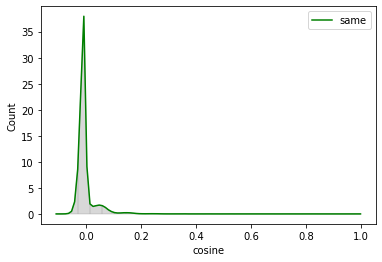

,manhattan,cosine,label,genres,author
autoren_lyrik_lemma_fontane_Nette Bücher,187.75,-0.01,same,lyrik,fontane
autoren_lyrik_lemma_fontane_Weltzeitungs-Inserat,195.81,-0.02,same,lyrik,fontane
autoren_lyrik_lemma_fontane_An die Autoritätsklauber,197.58,-0.01,same,lyrik,fontane
autoren_lyrik_lemma_fontane_Sanft ruhe seine Asche,198.98,-0.01,same,lyrik,fontane
autoren_lyrik_lemma_fontane_Suum Cuique,199.17,-0.01,same,lyrik,fontane
...,...,...,...,...,...
autoren_lyrik_lemma_Fontane_Die zwei Raben,295.83,0.01,same,lyrik,Fontane
autoren_lyrik_lemma_Fontane_10. Man wird nicht besser mit den Jahren,301.26,-0.01,same,lyrik,Fontane
autoren_lyrik_lemma_Fontane_Der erste Schnee,304.33,-0.01,same,lyrik,Fontane
autoren_lyrik_lemma_Fontane_7. Tritt ein für deines Herzens Meinung,304.46,-0.01,same,lyrik,Fontane


In [26]:
delta = delta[delta.cosine!=1.00]
# mfw = file.replace(prefix, "").split('_')[0]
# corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)

delta


In [ ]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


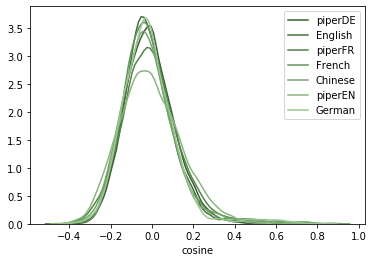

In [63]:
path = 'results/1000/*.h5'
prefix = 'results/1000'
for file in glob.glob(path):
    language = pd.read_hdf(file)
    language = language[language.cosine!=1.00]
    corp = file.replace('.h5', '').split('_')[2]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('delta_normaldist_1000mfw')

### Delta variance per corpus

In [115]:
v = delta.copy()
# v['corpus'] = 'Chinese'
v = v.drop('manhattan', axis=1)
v = v.drop('euclidean', axis=1)
v = v.drop('label', axis=1)
# v = v.drop('author', axis=1)
v = v.reset_index()
v = v.drop('index', axis=1)
v

,cosine,genres
0,0.00,lyrik
1,0.04,lyrik
2,0.06,lyrik
3,0.09,lyrik
4,0.02,lyrik
...,...,...
60757,0.04,epik
60758,0.08,epik
60759,-0.03,epik
60760,-0.02,epik


In [117]:
# variance = pd.DataFrame()
variance = pd.concat([variance, v])
variance = variance[variance['cosine']!=0.00]
variance

,cosine,genres
1,0.04,lyrik
2,0.06,lyrik
3,0.09,lyrik
4,0.02,lyrik
5,0.02,lyrik
...,...,...
60757,0.04,epik
60758,0.08,epik
60759,-0.03,epik
60760,-0.02,epik


In [9]:
import pandas as pd 
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta.sort_values(by=['corpus'], inplace=True)
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
3755,"YanGelin,LvXie,seg.txt",0.09,Chinese
3754,"YanGelin,LuFanYanShi,seg.txt",0.10,Chinese
3753,"JiaPingwa,QinQiang,seg.txt",0.32,Chinese
3752,"ChenZhongshi,ChuXia,seg.txt",0.40,Chinese
...,...,...,...
37703,"Cladel,Leon_OMPDRAILLES_Novel.txt",-0.03,pipierFR
37704,"Zola,Emile_LeventredeParis_Novel.txt",-0.07,pipierFR
37705,"Charriere,IsabelleDe_CalisteOuLettresDeLausann...",0.12,pipierFR
37641,"Dumas,Alexandre_OlympesDesCleves_Novel.txt",-0.01,pipierFR


In [10]:
cutoff = pd.read_csv("entire_best_cutoff.csv")
cutoff.sort_values(by=['corpus'], inplace=True)
cutoff                   

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500


Text(0, 0.5, 'cosine')

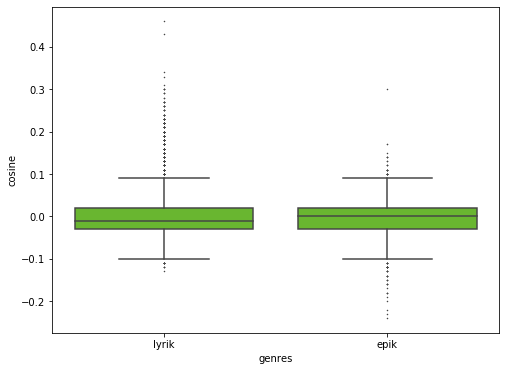

In [122]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='genres', y='cosine', data=delta, color=(0.4, 0.8, 0.1), fliersize=0.5)
# ax = sns.scatterplot(x='corpus', y='delta', data=cutoff, color='black', s=80, zorder=10)
plt.ylabel('cosine')
# plt.savefig("deltastreuung_plus_deltacutoff")

### Delta normal distribution

In [69]:
cutoff

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500


In [123]:
cos = delta.copy()
cos = cos[cos.cosine!=1.00]

In [124]:
plus_same = np.mean(cos[cos['label']=='same']['cosine']) + np.std(cos[cos['label']=='same']['cosine'])
minus_same = np.mean(cos[cos['label']=='same']['cosine']) - np.std(cos[cos['label']=='same']['cosine'])

plus_diff = np.mean(cos[cos['label']=='different']['cosine']) + np.std(cos[cos['label']=='different']['cosine'])
minus_diff = np.mean(cos[cos['label']=='different']['cosine']) - np.std(cos[cos['label']=='different']['cosine'])

print(plus_same, minus_same, plus_diff, minus_diff)

0.04451305977774847 -0.05296809497101655 0.03423736548476722 -0.03413231497971672


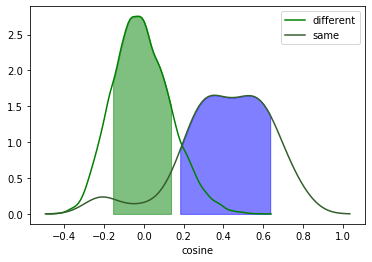

In [124]:
path = "project_stylometry_statistics/results/piperEN/delta/1000_delta_piperEN.h5"
prefix = "project_stylometry_statistics/results/piperEN/delta/"
corpus = 'piperEN'
def distplot(dist):
    ax = sns.distplot(dist['cosine'], hist=False, color='green')
    plt.savefig(mfw + '_' + corpus + '_delta_normaldist')
    plt.show()
    
import re
from scipy import stats


numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

        
        
for file in sorted(glob.glob(path), key=numericalSort):
    dist = pd.read_hdf(file)
    mfw = file.replace(prefix,'').split('_')[0]
    dist = dist[dist['cosine']!=1.00]

    #distplot(dist)
    #sns.set_palette("summer")
    sns.set_palette(sns.cubehelix_palette(14, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
#     ax = sns.distplot(dist['cosine'], hist=False, label=mfw)    #visualise all mfw steps

    #visualise same and different curve for one mfw step with quartile
    ax = sns.distplot(dist[dist['label']=='different']['cosine'], hist=False, label='different', color='g')
    kde = stats.gaussian_kde(dist[dist['label']=='different']['cosine'])
    shade = np.linspace(minus_diff, plus_diff, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='green')
    
    ax = sns.distplot(dist[dist['label']=='same']['cosine'], hist=False, label='same')
    kde = stats.gaussian_kde(dist[dist['label']=='same']['cosine'])
    shade = np.linspace(minus_same, plus_same, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='blue')
    
    
    plt.legend()
plt.savefig(corpus + '_delta_normaldist_quartile_MFW1000')

In [66]:
cutoff = pd.read_csv("project_stylometry_statistics/entire_best_cutoff.csv")

In [21]:
#vdelta = pd.DataFrame()
deltas = pd.read_hdf("project_stylometry_statistics/results/piperDE/delta/500_delta_piperDE.h5")
deltas.drop('manhattan', axis=1, inplace=True)
deltas.drop('euclidean', axis=1, inplace=True)
deltas.drop('label', axis=1, inplace=True)
deltas.drop('author', axis=1, inplace=True)
deltas['corpus']='piperDE'
vdelta=pd.concat([vdelta, deltas])
vdelta

,cosine,corpus
"BiShuMin,HuaGuanBingDu,seg.txt",1.00,Chinese
"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
...,...,...
"Ehrmann,Marianne_Amalie.EinewahreGeschichteinBriefen_Novel.txt",-0.35,piperDE
"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [35]:
vdelta.to_csv("delta_varianz_allekorpora")

In [41]:
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
2,"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
3,"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
4,"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
5,"YvQiuyv,WenHuaKuLv,seg.txt",0.13,Chinese
...,...,...,...
90296,"Ehrmann,Marianne_Amalie.EinewahreGeschichteinB...",-0.35,piperDE
90297,"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
90298,"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
90299,"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [64]:
german = vdelta[vdelta['corpus']=='German']
chinese = vdelta[vdelta['corpus']=='Chinese']
french = vdelta[vdelta['corpus']=='French']
english = vdelta[vdelta['corpus']=='English']
piperDE = vdelta[vdelta['corpus']=='piperDE']
piperFR = vdelta[vdelta['corpus']=='pipierFR']
piperFR.corpus='piperFR'
piperEN = vdelta[vdelta['corpus']=='piperEN']
liste = [german, chinese, french, english, piperDE, piperEN, piperFR]

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


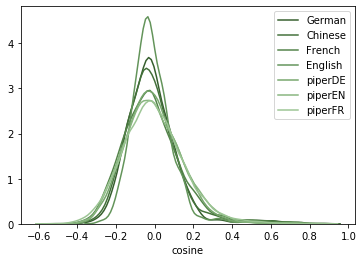

In [65]:
for language in liste:
    corp = np.unique(language['corpus'])[0]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('_delta_normaldist_best_cutoffs')